# Imported Modules

This Jupyter Notebook processes the necessary file under `data_out/submission-fixed-nb_processed.csv`generated from various processing scripts in various phases of the pipeline. The result of this notebook when executed will result in the generation of `Figure 4` as described in the paper.

Figure 4 in the paper describes the top 10 popular imported modules ranked by usaged frequency


## Required Libraries:

- `json`
- `matplotlib`
- `pandas`
- `seaborn`

In [1]:
import json
import matplotlib
import matplotlib.pyplot as plt
import pandas
import seaborn as sns

matplotlib.rcParams.update({'pdf.fonttype': 42, 'ps.fonttype': 42})

In [2]:
df = pandas.read_csv('./data_out/nb_processed.csv', 
                     converters={'image_metadata': json.loads, 
                                 'imports': json.loads, 
                                 'code_lines': json.loads, 
                                 'markdown_lines': json.loads})

In [3]:
imports_used = {}
for index, row in df.iterrows():
    data = row['imports']
    for element in data:
        if element not in imports_used:
            imports_used[element] = 0
        imports_used[element] = imports_used[element] + 1

import_df = pandas.DataFrame(data=[[k, v] for k, v in imports_used.items()], 
                             columns=['Imported Module', 'Number of Occurences'])

In [4]:
import_df = import_df.sort_values(by=['Number of Occurences'], ascending=False)
import_df['Imported Module'] = import_df['Imported Module'].str.strip().replace(' ', '.')

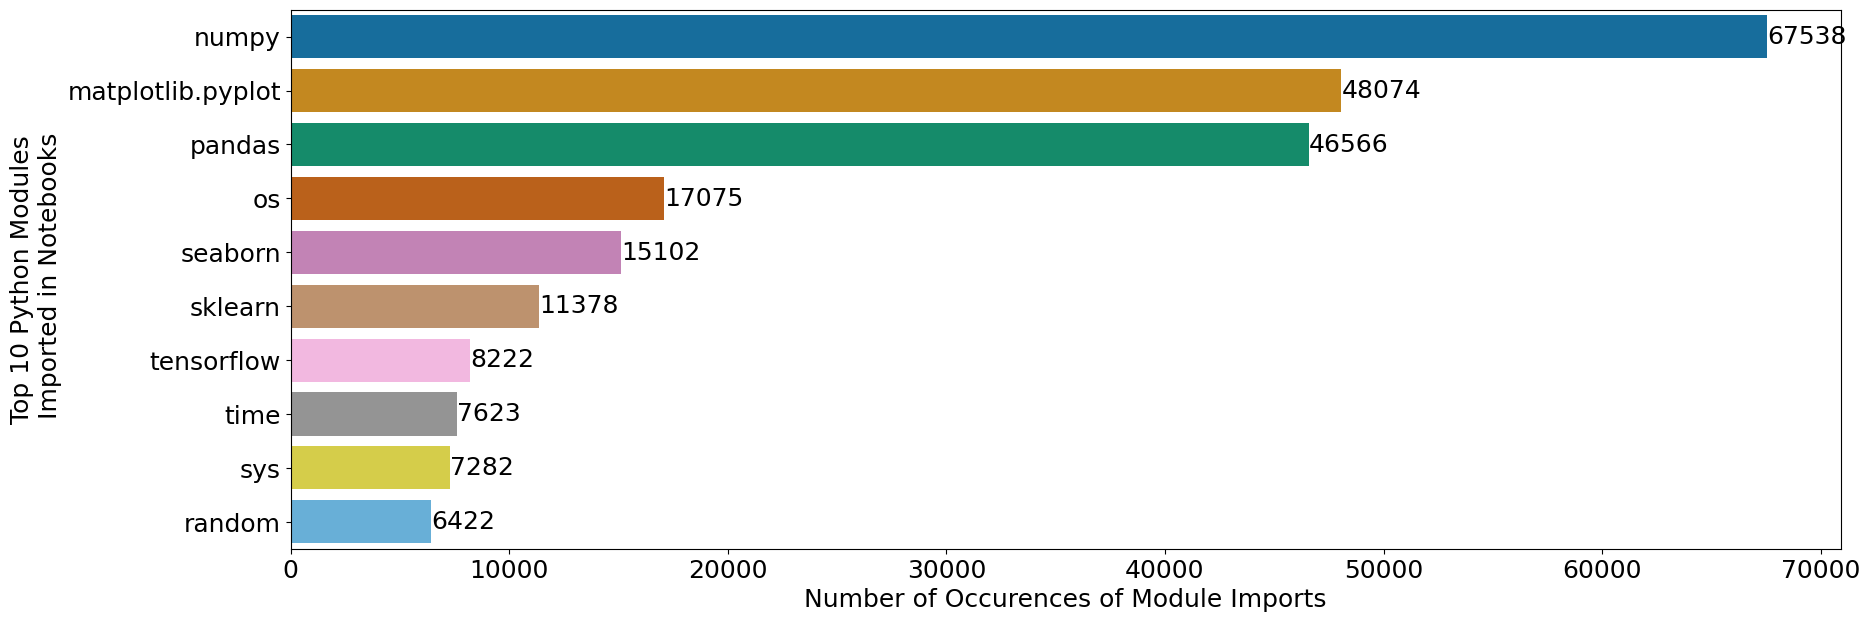

In [5]:
image_description = """The figure contains a horizontal bar plot with the x axis indicating the number of occurences of module imports, 
and the y axis indicating the top 10 imported python modules. The horizontal bars use colors from the colorblind 
palette provided by seaborn and indicate numpy, matplotlib.pyplot, pandas, os, seaborn, sklearn, tensorflow, time,
sys, and random with their respective counts."""


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
plt.rcParams['font.size'] = 18
top_10_results = import_df[:10]
top_10_results.loc[top_10_results['Imported Module'].str.contains('sklearn.model_selection train_test_split'), 'Imported Module'] = 'sklearn'
sns.barplot(x="Number of Occurences", y="Imported Module", data=top_10_results, ax=ax, palette='colorblind')
ax.bar_label(ax.containers[0])
ax.tick_params(labelsize=18)
ax.set_ylabel('Top 10 Python Modules\n Imported in Notebooks', fontsize=18)
ax.set_xlabel('Number of Occurences of Module Imports', fontsize=18)
plt.savefig('./plot_out/fig-4-top-10-import-modules.pdf', bbox_inches='tight')
plt.savefig('./plot_out/alt-embedded-images/fig-4-top-10-import-modules.png', metadata={
    'alt': image_description,
}, bbox_inches='tight')

**Fig 4**: The figure contains a horizontal bar plot with the x axis indicating the number of occurences of module imports, and the y axis indicating the top 10 imported python modules. The horizontal bars use colors from the colorblind palette provided by seaborn and indicate numpy, matplotlib.pyplot, pandas, os, seaborn, sklearn, tensorflow, time, sys, and random with their respective counts.


-----
